In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import splitfolders
splitfolders.ratio(
    '/content/drive/MyDrive/H D D/gwbz3fsgp8-2',
   output="./dataset",
   seed=7,
   ratio=(0.8,0.1, 0.1)
)


Copying files: 928 files [00:27, 33.88 files/s] 


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Change this line to match the number of classes in your dataset
num_classes = 4 # Modify based on your dataset

# Dense (fully connected) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
model.add(layers.Dense(num_classes, activation='sigmoid'))  # Assuming binary classification


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Specify the paths to your train, test, and validation datasets
train_path = '/content/dataset/train'
test_path = '/content/dataset/test'
val_path = '/content/dataset/val'

In [ ]:
# Set batch size
batch_size = 32

# Create generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(val_path,
                                                        target_size=(224, 224),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 741 images belonging to 4 classes.
Found 91 images belonging to 4 classes.
Found 96 images belonging to 4 classes.


In [ ]:
# Train the model

history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=200,  # Adjust the number of epochs as needed
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2400 - loss: 0.6435 - val_accuracy: 0.2188 - val_loss: 0.5562
Epoch 2/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.3125 - loss: 0.5801

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.3125 - loss: 0.5801 - val_accuracy: 0.2500 - val_loss: 0.5554
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 998ms/step - accuracy: 0.2766 - loss: 0.5745 - val_accuracy: 0.2969 - val_loss: 0.5629
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.4062 - loss: 0.5764 - val_accuracy: 0.3750 - val_loss: 0.5626
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2494 - loss: 0.5832 - val_accuracy: 0.3125 - val_loss: 0.5554
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.2812 - loss: 0.5762 - val_accuracy: 0.2969 - val_loss: 0.5533
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2994 - loss: 0.5771 - val_accuracy: 0.2656 - val_loss: 0.5596
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.1562 - loss: 0.5894 - val_accuracy: 0.3125 - val_loss: 0.5541
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2500 - loss: 0.5697 - val_accuracy: 0.3281 - val

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

# Save the trained model
model.save('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 631ms/step - accuracy: 0.7852 - loss: 0.2343
Test accuracy: 0.78125


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories and parameters for test data
test_data_dir = '/content/dataset/test'
batch_size = 32
input_shape = (224, 224)  # Ensure it matches the input shape used during training

# Test data generator (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False for test data
)

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Replace with your saved model file name

# Evaluate the model on the test set
evaluation = model.evaluate(test_generator, verbose=1)

# Extract metrics
test_loss = evaluation[0]
test_accuracy = evaluation[1]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Found 96 images belonging to 4 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step - accuracy: 0.7773 - loss: 0.2580
Test Loss: 0.2462
Test Accuracy: 78.12%


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7773 - loss: 0.2580   
Test accuracy: 78.12%


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 524ms/step


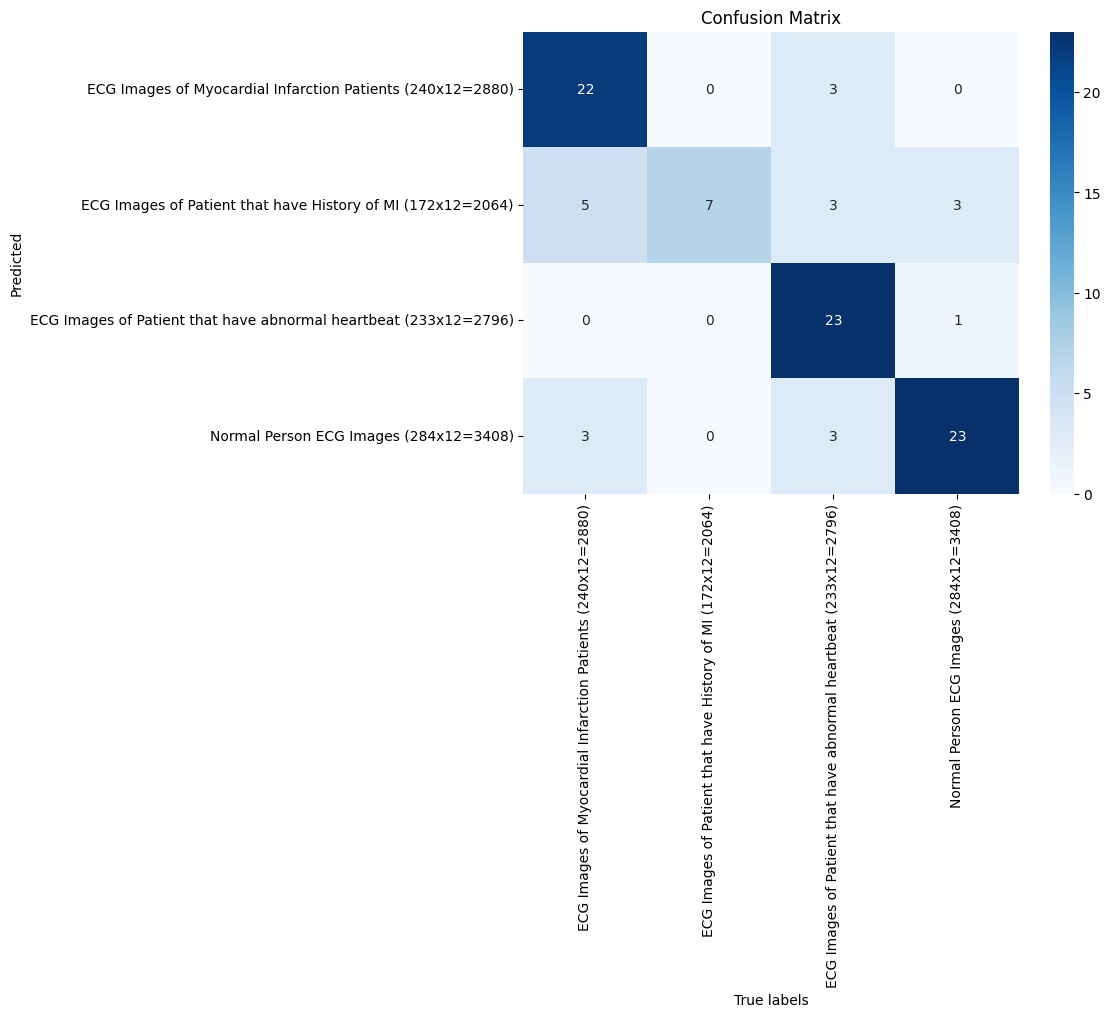

                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.73      0.88      0.80        25
     ECG Images of Patient that have History of MI (172x12=2064)       1.00      0.39      0.56        18
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.72      0.96      0.82        24
                          Normal Person ECG Images (284x12=3408)       0.85      0.79      0.82        29

                                                        accuracy                           0.78        96
                                                       macro avg       0.83      0.76      0.75        96
                                                    weighted avg       0.82      0.78      0.77        96



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Assuming you have your test data generator and labels
test_generator.reset()  # Reset the generator before using it for predictions

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
confusion_mtx = confusion_matrix(true_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices,
            yticklabels=test_generator.class_indices)
plt.xlabel('True labels')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(true_labels, y_pred, target_names=test_generator.class_indices.keys()))

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


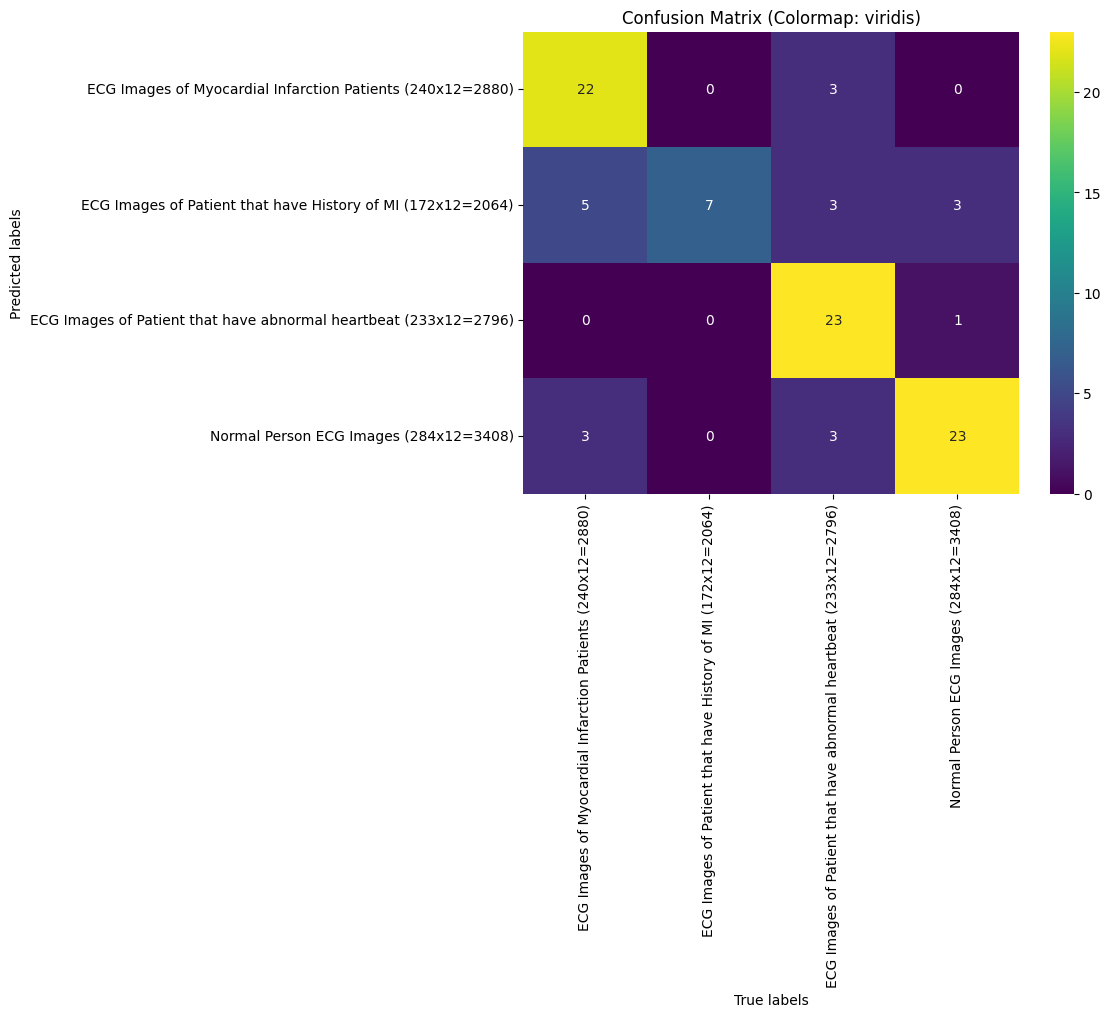

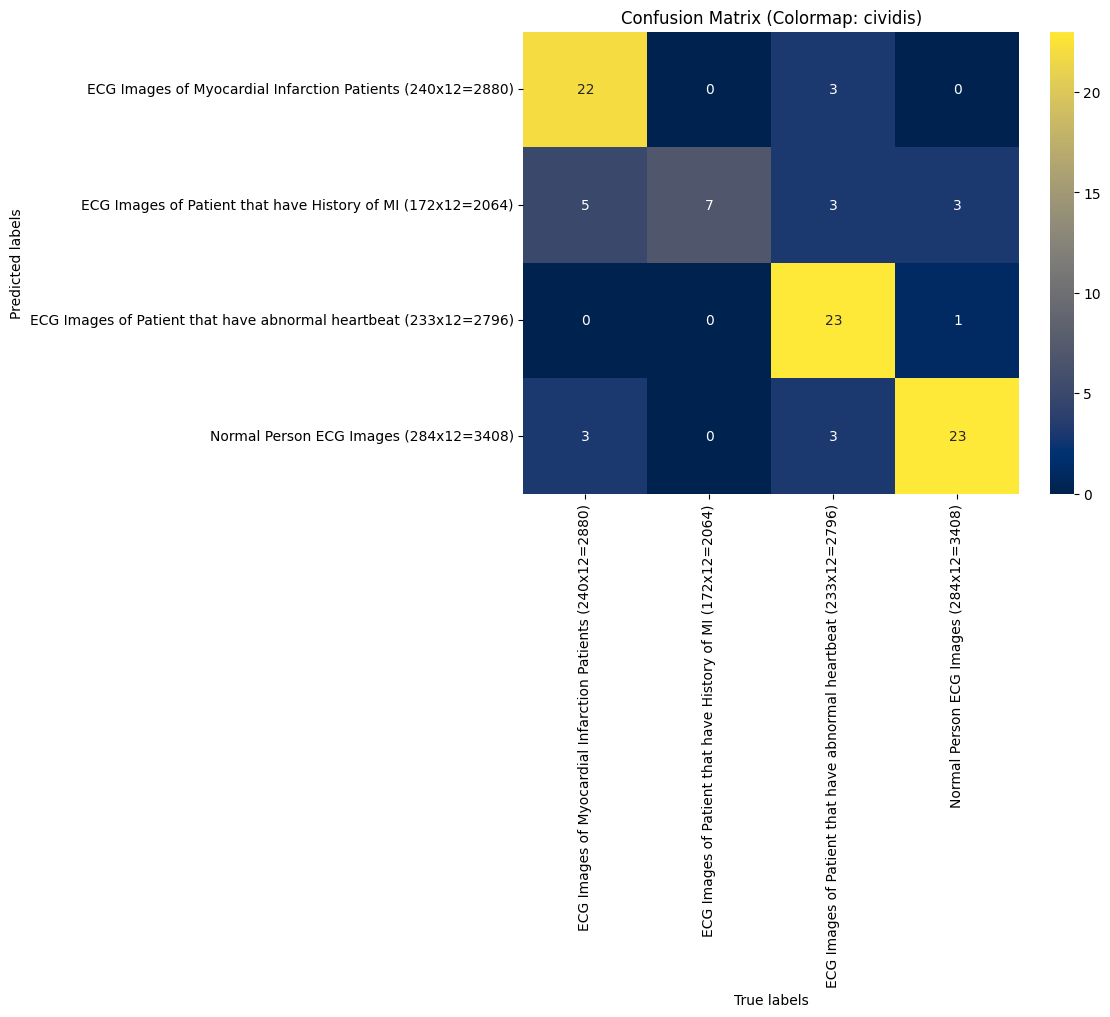

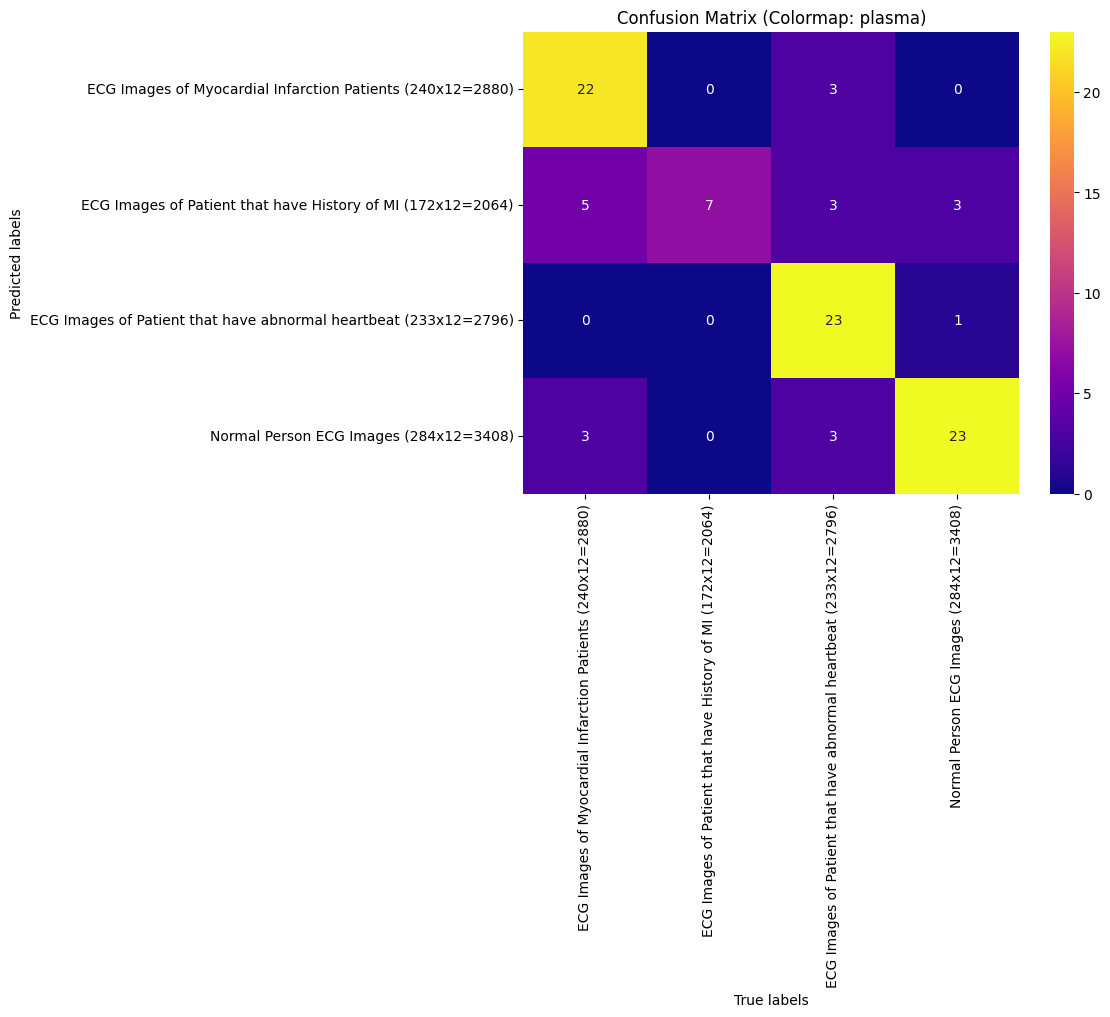

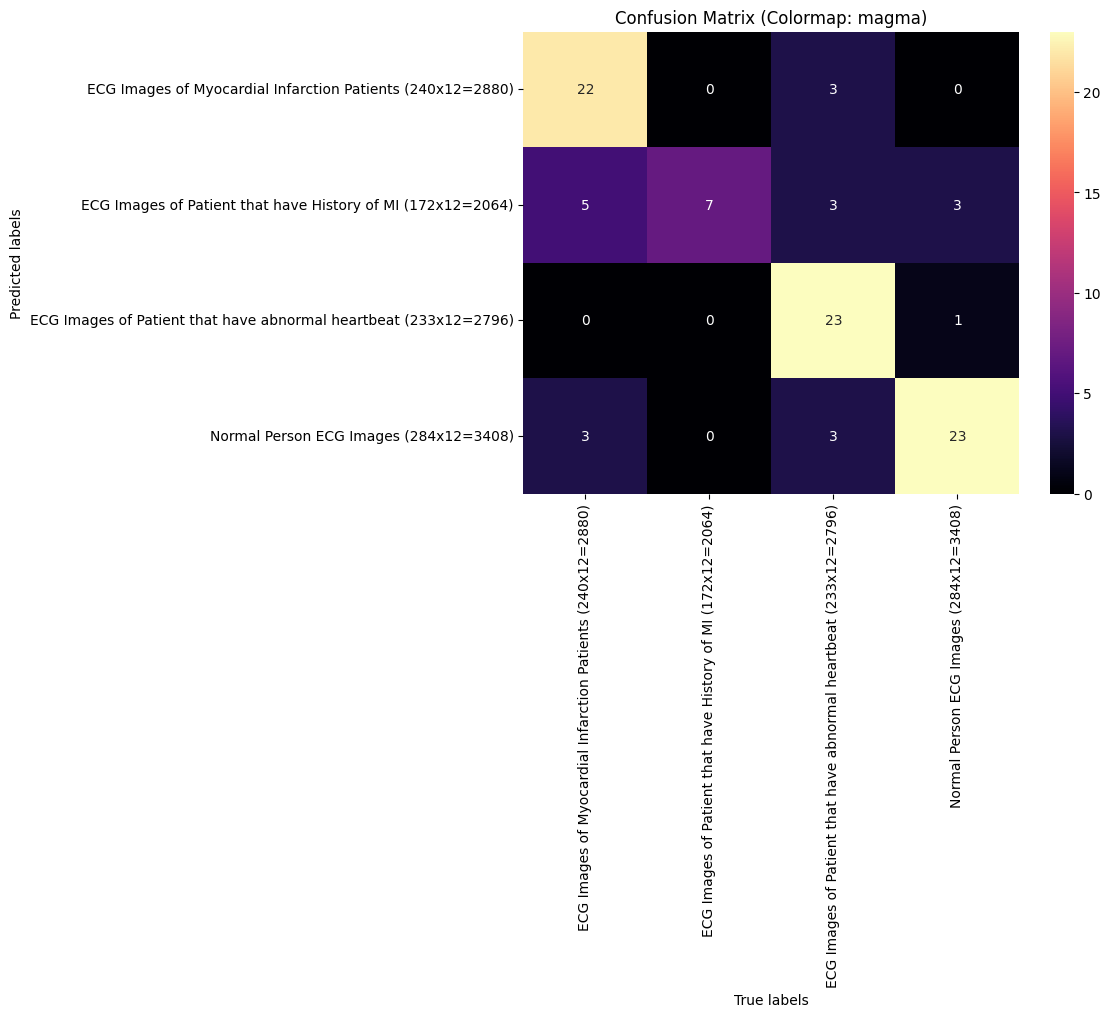

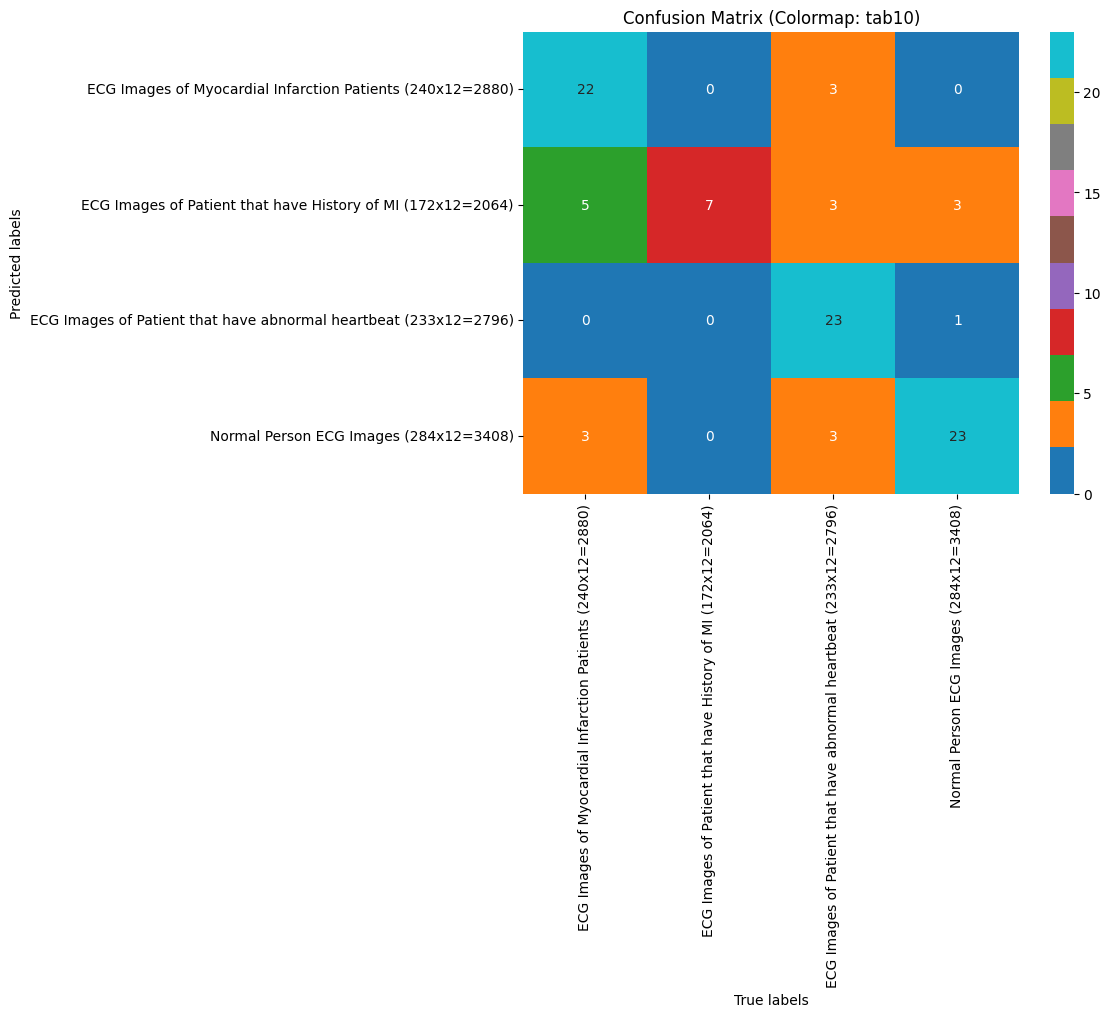

                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.73      0.88      0.80        25
     ECG Images of Patient that have History of MI (172x12=2064)       1.00      0.39      0.56        18
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.72      0.96      0.82        24
                          Normal Person ECG Images (284x12=3408)       0.85      0.79      0.82        29

                                                        accuracy                           0.78        96
                                                       macro avg       0.83      0.76      0.75        96
                                                    weighted avg       0.82      0.78      0.77        96



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your test data generator and labels
test_generator.reset()  # Reset the generator before using it for predictions

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Generate confusion matrix
confusion_mtx = confusion_matrix(true_labels, y_pred)

# Generate confusion matrix with different colormaps
cmaps = ['viridis', 'cividis', 'plasma', 'magma', 'tab10']
for cmap in cmaps:
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=cmap,
                xticklabels=test_generator.class_indices,
                yticklabels=test_generator.class_indices)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.title(f'Confusion Matrix (Colormap: {cmap})')
    plt.show()
# Classification report
print(classification_report(true_labels, y_pred, target_names=test_generator.class_indices.keys()))


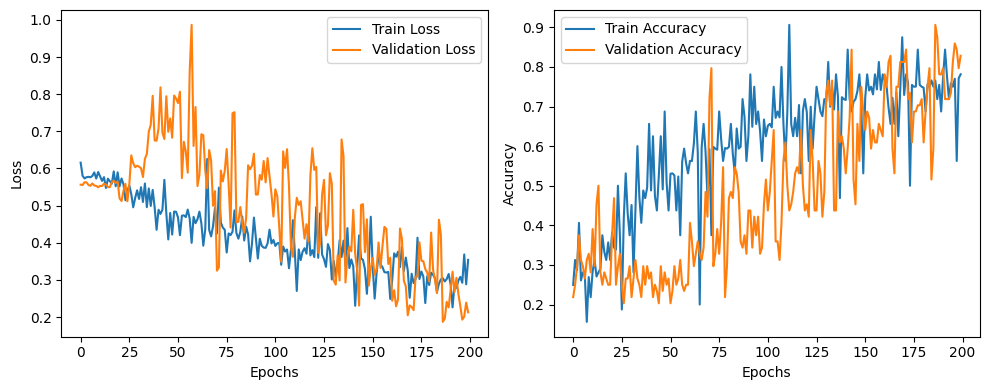

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories and parameters for test data
test_data_dir = '/content/dataset/test'
batch_size = 32
input_shape = (224, 224)  # Ensure it matches the input shape used during training

# Test data generator (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: set shuffle to False for test data
)

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Replace with your saved model file name

# Evaluate the model on the test set
evaluation = model.evaluate(test_generator, verbose=1)

# Extract metrics
test_loss = evaluation[0]
test_accuracy = evaluation[1]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Found 96 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.7773 - loss: 0.2580
Test Loss: 0.2462
Test Accuracy: 78.12%


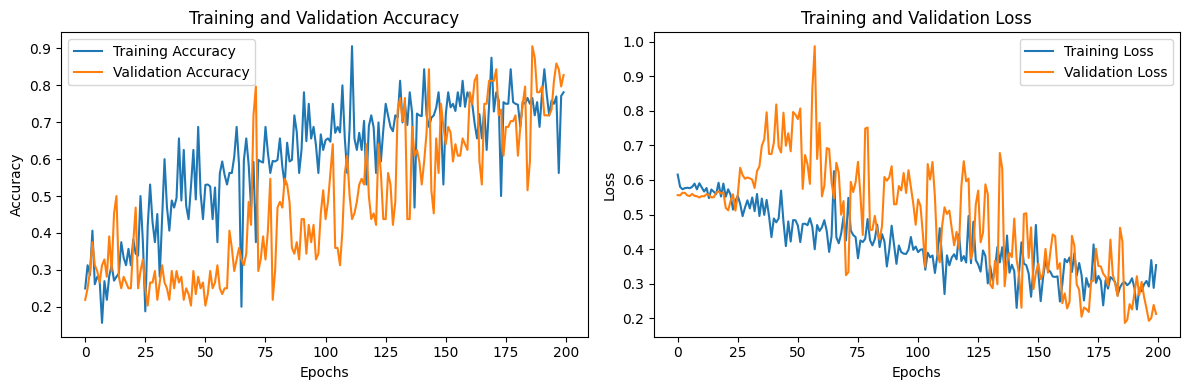

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


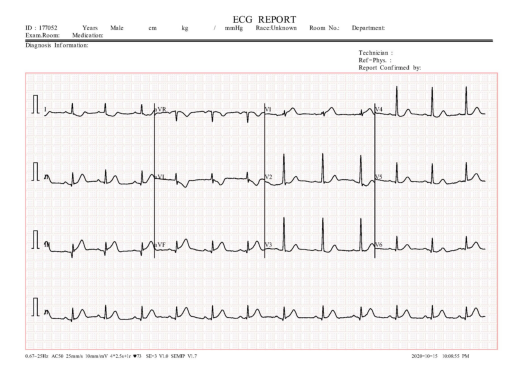

Predicted class: myocardial


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI(102).jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels = ['myocardial', 'MI', 'abnormal', 'normal']  # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


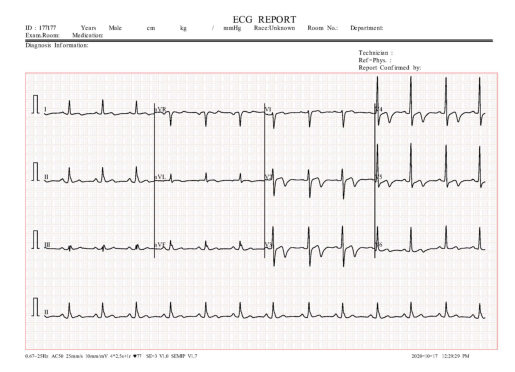

Predicted class: abnormal


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/ECG Images of Patient that have History of MI (172x12=2064)/PMI(141).jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels = ['myocardial', 'MI','abnormal', 'normal']  # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


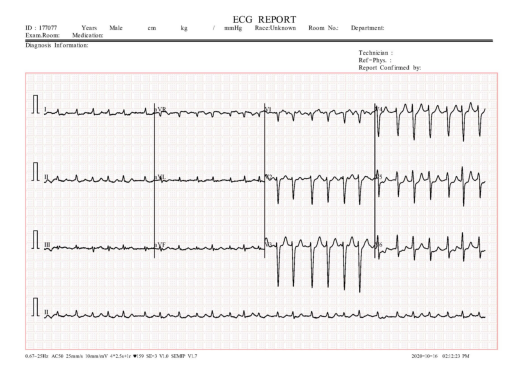

Predicted class: abnormal


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB(101).jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels = ['Myocardial', 'MI', 'abnormal', 'normal']  # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


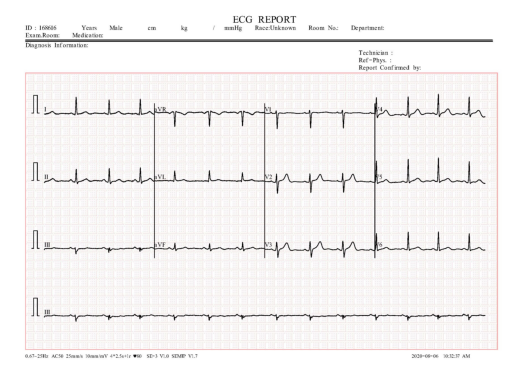

Predicted class: normal


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/H D D/gwbz3fsgp8-2/Normal Person ECG Images (284x12=3408)/Normal(12).jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Classify the input image
predictions = model.predict(img)

# Get the class label
class_label = np.argmax(predictions)
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Define your class labels
class_labels = ['Myocardial', 'MI', 'abnormal', 'normal']  # Replace with your class labels

predicted_class_label = class_labels[class_label]

print(f'Predicted class: {predicted_class_label}')


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define the number of classes
num_classes = 4  # Change this to match the number of classes in your dataset

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')

# Load and preprocess the test data
test_data_dir = '/content/dataset/test'  # Replace with the path to your test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=1,  # Set batch_size to 1 for individual predictions
    class_mode='categorical',
    shuffle=False  # Don't shuffle the data
)

# Make predictions on the test data and record true and predicted labels
for i in range(test_generator.samples):
    x, y = test_generator[i]
    true_label = np.argmax(y)
    predicted_label = np.argmax(model.predict(x))
    true_labels.append(true_label)
    predicted_labels.append(predicted_label)

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion)

# You can also print a classification report with precision, recall, and F1-score
target_names = ['Myocardial', 'MI', 'abnormal', 'normal']  # Replace with your class labels
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print("\nClassification Report:")
print(report)


Found 96 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━

Found 96 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


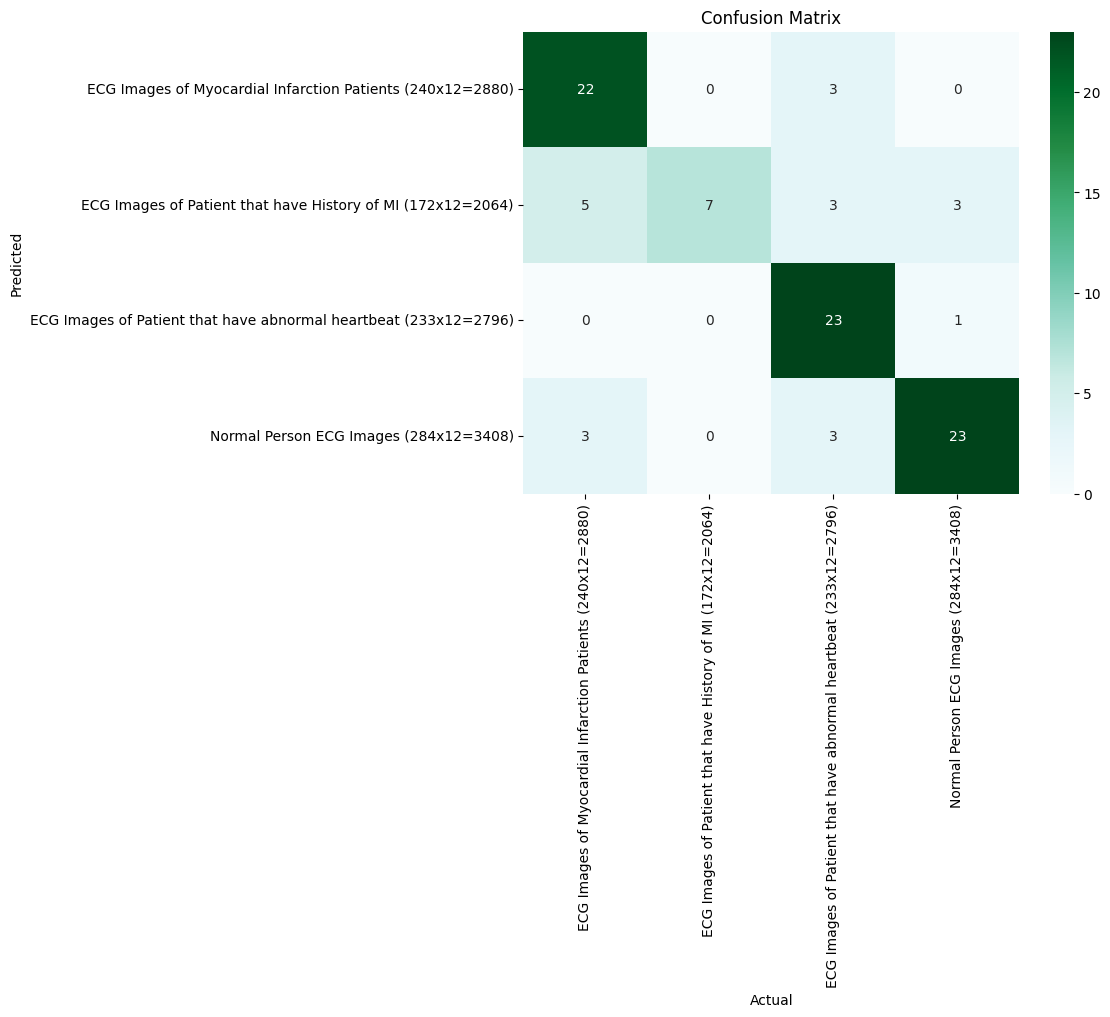

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Load your saved model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add other preprocessing options here if needed

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


# Obtain predicted classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuGn', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Found 96 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


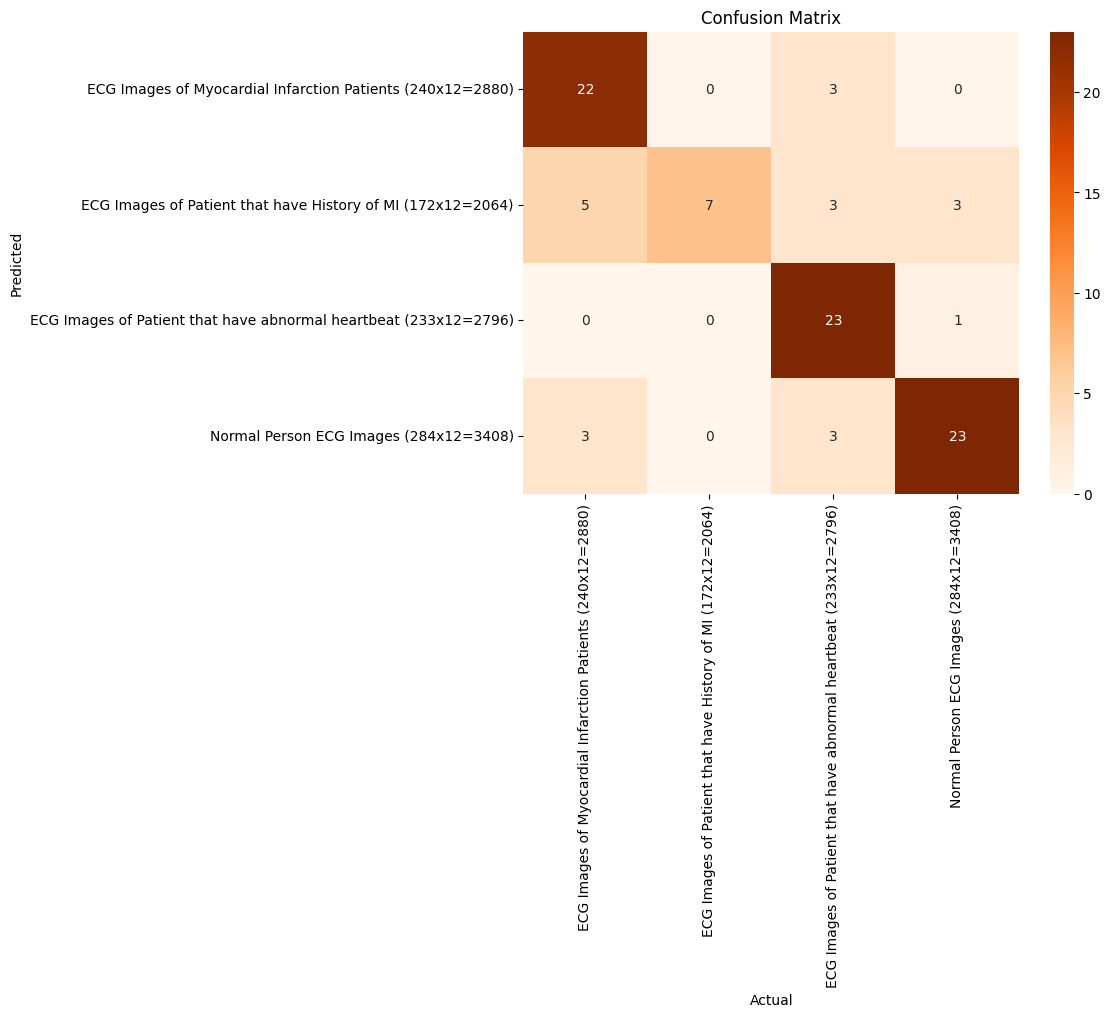

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Load your saved model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add other preprocessing options here if needed

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


# Obtain predicted classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Found 96 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


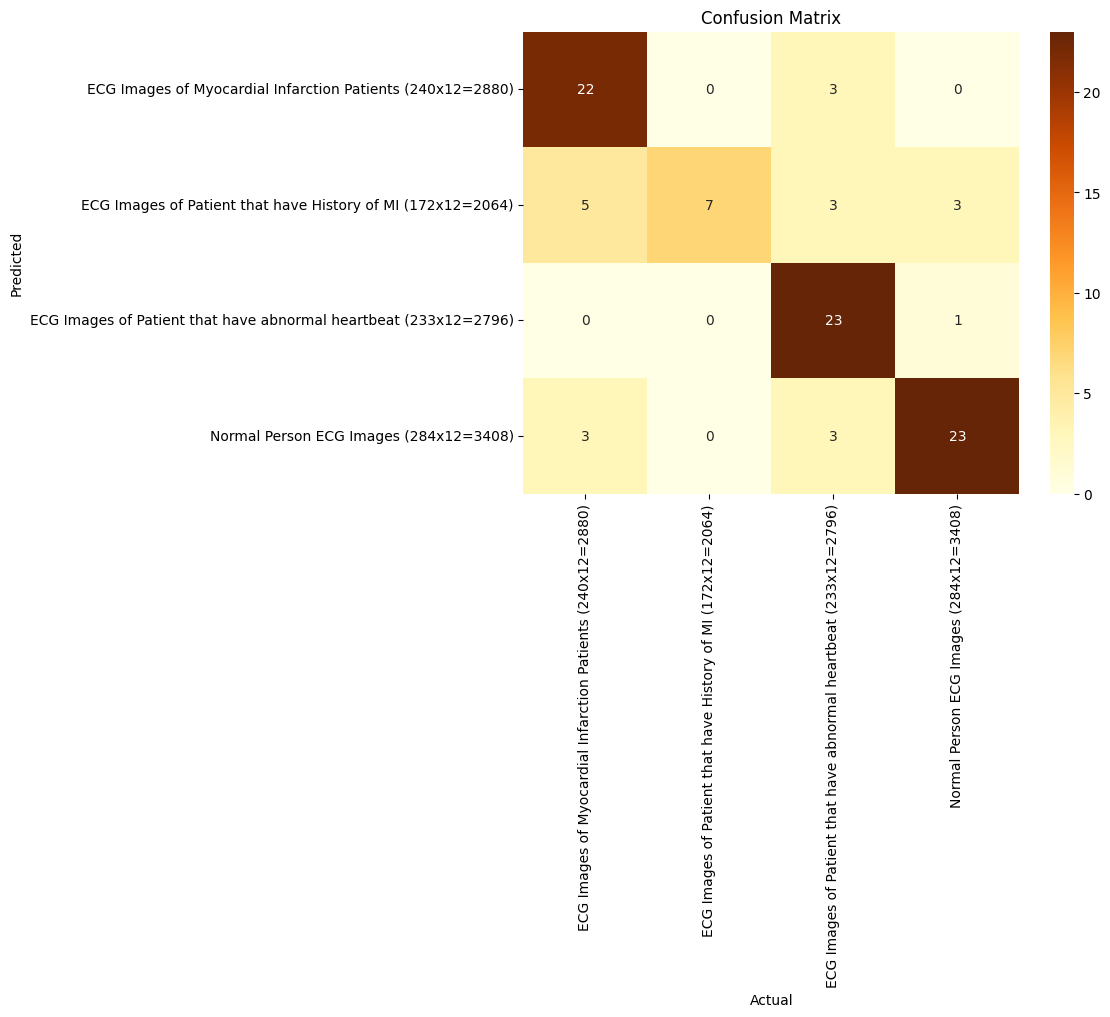

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/H D D/gwbz3fsgp8-2.keras')  # Load your saved model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # You can add other preprocessing options here if needed

# Set up the test generator
test_generator = test_datagen.flow_from_directory(
    '/content/dataset/test',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


# Obtain predicted classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Get class names
class_names = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()